#Import Library

Pada tahapan ini, kita perlu melakukan import untuk library-library yang akan diperlukan dalam proses pemodelan dan analisis data.

In [4]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_colwidth", 1000)

#Data Wrangling

## Import Dataset

Definisikan nama file csv dan file feather yang akan disimpan.

In [5]:
csv_filename = '/content/drive/MyDrive/Rakamin Academy/ID X Partners/loan_data_2007_2014.csv'
feather_filename = "loan_data_2007_2014.feather"

Import csv dan copy file menjadi file feather untuk kemudian digunakan seterusnya dalam program ini.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
if not os.path.exists(feather_filename):
    # Baca melalui csv
    df = pd.read_csv(csv_filename)

    # Ubah ke feather
    df.to_feather("loan_data_2007_2014.feather")

<ipython-input-7-0172ed305cad>:3: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_filename)


Convert file csv menjadi file feather untuk mempersingkat running dan load time dataset yang akan digunakan sepanjang pengolahan data.

In [8]:
raw_df = pd.read_feather(feather_filename)

In [9]:
raw_df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,...,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,None,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,...,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,...,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,None,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077175,None,small_business,real estate business,606xx,IL,...,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1076863,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>",other,personel,917xx,CA,...,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1075358,"Borrower added on 12/21/11 > I plan on combining three large interest bills together and freeing up some extra each month to pay toward other bills. I've always been a good payor but have found myself needing to make adjustments to my budget due to a medical scare. My job is very stable, I love it.<br>",other,Personal,972xx,OR,...,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Import features/atribut dari dataset dan pilih sheet Excel yang digunakan, yaitu "LoanStats"

In [10]:
data_dict = pd.read_excel("/content/drive/MyDrive/Rakamin Academy/ID X Partners/LCDataDictionary.xlsx", sheet_name="LoanStats")

Tampilkan features dataset

In [11]:
data_dict[["Feature","Description"]]

,Feature,Description
0,_rec,The total amount committed by investors for that loan at that point in time.
1,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,collection_recovery_fee,post charge off collection fee
8,collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections
9,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years


## Data Cleaning

During this stage, the data cleaning process is implemented to **address missing values** in specific columns. This involves identifying and handling gaps or null entries in the dataset, ensuring a more accurate and complete dataset for subsequent analyses.

Techniques such as imputation or removal of incomplete records is employed to enhance the overall data quality.

In [12]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

Terlihat bahwa banyak kolom yang terdapat _missing values_ di dalamnya. Selanjutnya, kita urutkan persentase _missing values_ tiap kolom mulai dari terbesar hingga terkecil.

In [13]:
(raw_df.isna().mean()*100).sort_values(ascending=False).head(30)

inq_last_12m                   100.000000
total_bal_il                   100.000000
dti_joint                      100.000000
verification_status_joint      100.000000
annual_inc_joint               100.000000
open_acc_6m                    100.000000
open_il_6m                     100.000000
open_il_12m                    100.000000
open_il_24m                    100.000000
mths_since_rcnt_il             100.000000
il_util                        100.000000
open_rv_24m                    100.000000
total_cu_tl                    100.000000
inq_fi                         100.000000
max_bal_bc                     100.000000
all_util                       100.000000
open_rv_12m                    100.000000
mths_since_last_record          86.566585
mths_since_last_major_derog     78.773926
desc                            72.981546
mths_since_last_delinq          53.690554
next_pymnt_d                    48.728567
tot_cur_bal                     15.071469
tot_coll_amt                    15

Next, the columns with >40% or nearly half missing values will be removed to make data analysis process easier and more efficient.

In [14]:
missing_values = raw_df.isna().mean()*100
col_missingvalues = missing_values[missing_values > 40].index
col_missingvalues

Index(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'inq_fi', 'total_cu_tl', 'inq_last_12m'],
      dtype='object')

In [15]:
raw_df.drop(col_missingvalues, axis = 1, inplace = True)

In [16]:
# Dropping/removing duplicate data in the dataset
raw_df.drop_duplicates(inplace=True)

In [17]:
print('id',raw_df['id'].nunique())
print('member id',raw_df['member_id'].nunique())

id 466285
member id 466285


There is no more duplicate data in this dataset.

In [18]:
raw_df.head(10)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,None,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501,credit_card,Computer,860xx,AZ,27.65,...,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077430,car,bike,309xx,GA,1.00,...,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,None,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077175,small_business,real estate business,606xx,IL,8.72,...,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1076863,other,personel,917xx,CA,20.00,...,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1075358,other,Personal,972xx,OR,17.94,...,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
5,5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1075269,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,...,9.0,0.0,7963,28.3,12.0,f,0.00,0.00,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,Jan-15,161.03,Sep-15,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
6,6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1069639,debt_consolidation,Loan,280xx,NC,23.51,...,7.0,0.0,17726,85.6,11.0,f,1889.15,1889.15,8136.840000,8136.84,5110.85,3025.99,0.00,0.00,0.00,Jan-16,170.08,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
7,7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1072053,car,Car Downpayment,900xx,CA,5.35,...,4.0,0.0,8221,87.5,4.0,f,0.00,0.00,3938.144334,3938.14,3000.00,938.14,0.00,0.00,0.00,Jan-15,111.34,Dec-14,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
8,8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,F2,None,4 years,OWN,40000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1071795,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,...,11.0,0.0,5210,32.

### Handling Missing Value with Data Imputation

In [19]:
# Addressing missing value

## Categorical Columns
cat_col = ['emp_length', 'emp_title', 'title']
raw_df[cat_col] = raw_df[cat_col].fillna(value={'emp_length': '10+ years', 'emp_title': 'Teacher', 'title': 'Debt Consolidation'})

## Mapping term values to numeric
raw_df['term'] = raw_df['term'].replace({'36 months': 36, '60 months': 60})

## Numerical Columns
num_col = ['annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc',
           'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']
raw_df[num_col] = raw_df[num_col].fillna(value=raw_df[num_col].median())

## Datetime Columns
date_col = ['earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']
raw_df[date_col] = raw_df[date_col].ffill()

In [20]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 53 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  466285 non-null  int64  
 1   id                          466285 non-null  int64  
 2   member_id                   466285 non-null  int64  
 3   loan_amnt                   466285 non-null  int64  
 4   funded_amnt                 466285 non-null  int64  
 5   funded_amnt_inv             466285 non-null  float64
 6   term                        466285 non-null  object 
 7   int_rate                    466285 non-null  float64
 8   installment                 466285 non-null  float64
 9   grade                       466285 non-null  object 
 10  sub_grade                   466285 non-null  object 
 11  emp_title                   466285 non-null  object 
 12  emp_length                  466285 non-null  object 
 13  home_ownership

### Datetype Data Converting

1. issue_d: The month which the loan was funded.
2. earliest_cr_line:The month the borrower's earliest reported credit line was opened
3. last_pymnt_d: Last month payment was received
4. last_credit_pull_d: The recent date a lender checked an individual's credit for a lending decision.

In [21]:
datetype_df = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']

In [22]:
for col in datetype_df:
  # Convert column to datetime format and adjust the year interpretation
  raw_df[col] = pd.to_datetime(raw_df[col], format='%b-%y')
  current_year = pd.Timestamp.now().year
  raw_df[col] = raw_df[col].apply(lambda x: x - pd.DateOffset(years=100) if x.year > current_year else x)

  # Calculate the months since the earliest credit line
  raw_df['months_since_'+col] = round(pd.to_numeric((pd.to_datetime('2023-11-01') - raw_df[col]) / np.timedelta64(1, 'M')))

  # Checking negative values in months
  if any(raw_df['months_since_'+col]<0) == False:
    print("Succeed")
  else:
    print("There are still negative values in the column")

  # Delete prior variable
  raw_df.drop(col, axis=1, inplace=True)

Succeed
Succeed
Succeed
Succeed


### Categorizing Numerical Variable

In [23]:
# Create a function to classify credit utilization rate
def classify_credit_utilization_rate(utilization_rate):
    if utilization_rate <= 10:
        return 'Excellent'
    elif 10 < utilization_rate <= 20:
        return 'Good'
    elif 20 < utilization_rate <= 30:
        return 'Fair'
    elif 30 < utilization_rate <= 50:
        return 'High'
    else:
        return 'Poor'

In [24]:
# Apply the classification function to create the new column
raw_df['credit_util_rate'] = raw_df['revol_util'].apply(classify_credit_utilization_rate)

## Label Checking

In [25]:
# Specify the list of categorical columns
categorical_cols = raw_df.select_dtypes(exclude='number').columns.tolist()
categorical_cols

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'initial_list_status',
 'application_type',
 'credit_util_rate']

In [26]:
for i in categorical_cols:
  df = raw_df[i]
  print('nunique variabel {} sebanyak {}'.format(i, df.nunique()))

nunique variabel term sebanyak 2
nunique variabel grade sebanyak 7
nunique variabel sub_grade sebanyak 35
nunique variabel emp_title sebanyak 205475
nunique variabel emp_length sebanyak 11
nunique variabel home_ownership sebanyak 6
nunique variabel verification_status sebanyak 3
nunique variabel loan_status sebanyak 9
nunique variabel pymnt_plan sebanyak 2
nunique variabel url sebanyak 466285
nunique variabel purpose sebanyak 14
nunique variabel title sebanyak 63099
nunique variabel zip_code sebanyak 888
nunique variabel addr_state sebanyak 50
nunique variabel initial_list_status sebanyak 2
nunique variabel application_type sebanyak 1
nunique variabel credit_util_rate sebanyak 5


In [27]:
# Drop emp_title, title, dan zip_code since it has a lot of categories
raw_df.drop(['emp_title','title','zip_code','url','application_type'], axis=1, inplace=True)

In [28]:
categorical_cols = [col for col in categorical_cols if col not in ['loan_status', 'emp_title', 'title', 'zip_code','url','application_type']]

In [29]:
# Extract numerical columns
numerical_cols = raw_df.select_dtypes(include='number').columns.tolist()
numerical_cols

['Unnamed: 0',
 'id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'months_since_issue_d',
 'months_since_earliest_cr_line',
 'months_since_last_pymnt_d',
 'months_since_last_credit_pull_d']

In [30]:
for i in numerical_cols:
  df = raw_df[i]
  print('nunique variabel {} sebanyak {}'.format(i, df.nunique()))

nunique variabel Unnamed: 0 sebanyak 466285
nunique variabel id sebanyak 466285
nunique variabel member_id sebanyak 466285
nunique variabel loan_amnt sebanyak 1352
nunique variabel funded_amnt sebanyak 1354
nunique variabel funded_amnt_inv sebanyak 9854
nunique variabel int_rate sebanyak 506
nunique variabel installment sebanyak 55622
nunique variabel annual_inc sebanyak 31901
nunique variabel dti sebanyak 3997
nunique variabel delinq_2yrs sebanyak 24
nunique variabel inq_last_6mths sebanyak 28
nunique variabel open_acc sebanyak 62
nunique variabel pub_rec sebanyak 26
nunique variabel revol_bal sebanyak 58142
nunique variabel revol_util sebanyak 1269
nunique variabel total_acc sebanyak 112
nunique variabel out_prncp sebanyak 135665
nunique variabel out_prncp_inv sebanyak 141189
nunique variabel total_pymnt sebanyak 351609
nunique variabel total_pymnt_inv sebanyak 347659
nunique variabel total_rec_prncp sebanyak 172713
nunique variabel total_rec_int sebanyak 270249
nunique variabel tota

In [31]:
# Drop Unnamed: 0, id, and member_id since it contains unique values and won't be used in analysis
raw_df.drop(['Unnamed: 0','id','member_id'], axis=1, inplace=True)

In [32]:
numerical_cols = [col for col in numerical_cols if col not in ['Unnamed: 0','id','member_id']]

## Loan Status Categorizing

Before we dive into the detailed exploration, let's first figure out which borrowers or data can be considered as either `'bad loans' or 'good loans'`. We'll do this by looking at the different categories in loan_status and sorting them accordingly.

In [33]:
def count(df, y, **sns_kwargs):
    value_counts = df[y].value_counts()
    percentage = value_counts / value_counts.sum()
    percentage = percentage.apply("{:.2%}".format)
    return percentage

In [34]:
count(raw_df,'loan_status')

Current                                                48.09%
Fully Paid                                             39.62%
Charged Off                                             9.11%
Late (31-120 days)                                      1.48%
In Grace Period                                         0.67%
Does not meet the credit policy. Status:Fully Paid      0.43%
Late (16-30 days)                                       0.26%
Default                                                 0.18%
Does not meet the credit policy. Status:Charged Off     0.16%
Name: loan_status, dtype: object

Based on the loan status categories provided, loans are commonly categorized as either "good" or "bad" based on their repayment status.

**Good Loans:**
1. Current
2. Fully Paid
3. Does not meet the credit policy. Status:Fully Paid

**Bad Loans:**
1. Charged Off
2. Late (31-120 days)
3. In Grace Period
4. Late (16-30 days)
5. Default
6. Does not meet the credit policy. Status:Charged Off

**Explanation**

***Good Loans:*** These categories generally indicate that the borrower is up to date on payments, has fully repaid the loan, or, in the case of "Does not meet the credit policy. Status:Fully Paid," the loan was fully paid despite not meeting the credit policy.

***Bad Loans:*** These categories suggest potential issues with loan repayment. "Charged Off" typically means the lender has given up on attempting to collect the debt. Late payments, in grace periods, and defaults indicate various levels of delinquency.

In [35]:
Loan_Status = ['Charged Off', 'Default' , 'Does not meet the credit policy. Status:Charged Off','Late (31-120 days)', 'Late (16-30 days)', 'In Grace Period']
raw_df['Loan_Status'] = np.where(raw_df['loan_status'].isin(Loan_Status), "Bad", "Good")
raw_df['Loan_Status_num'] = np.where(raw_df['loan_status'].isin(Loan_Status), 1, 0)

In [36]:
count(raw_df,'Loan_Status')

Good    88.13%
Bad     11.87%
Name: Loan_Status, dtype: object

# Data Exploration

In [37]:
# Set Seaborn theme
sns.set_theme(style="darkgrid")

title_style = dict(size=20, weight="bold")

def count_plot(df, y_col, main_title, **plot_args):
    counts = df[y_col].value_counts()
    percentages = counts / counts.sum()
    percentages_str = percentages.apply("{:.2%}".format)

    plt.figure(figsize=(14, 10))
    plt.title(main_title, fontdict=title_style)
    ax = sns.countplot(data=df, y=y_col, order=counts.index, **plot_args)
    plt.ylabel("")

    # Add percentage labels
    for i, p in enumerate(ax.patches):
        percentage_label = f"{percentages_str[i]}"
        ax.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2, percentage_label, ha='left', va='center')

    plt.show()


def distribution_plot(df, x_col, main_title, **plot_args):
    plt.figure(figsize=(14, 10))
    plt.title(main_title, fontdict=title_style)
    sns.histplot(data=df, x=x_col, kde=True, **plot_args)
    plt.ylabel("")
    plt.show()


def box_plot(df, x_col, y_col, main_title, **plot_args):
    plt.figure(figsize=(14, 10))
    plt.title(main_title, fontdict=title_style)
    sns.boxplot(data=df, x=x_col, y=y_col, **plot_args)
    plt.ylabel("")
    plt.show()

## Variables

### Loan Status

The majority of loans are in the "Current" status. In terms of success, loans that are successfully repaid have a higher ratio compared to those that are overdue.

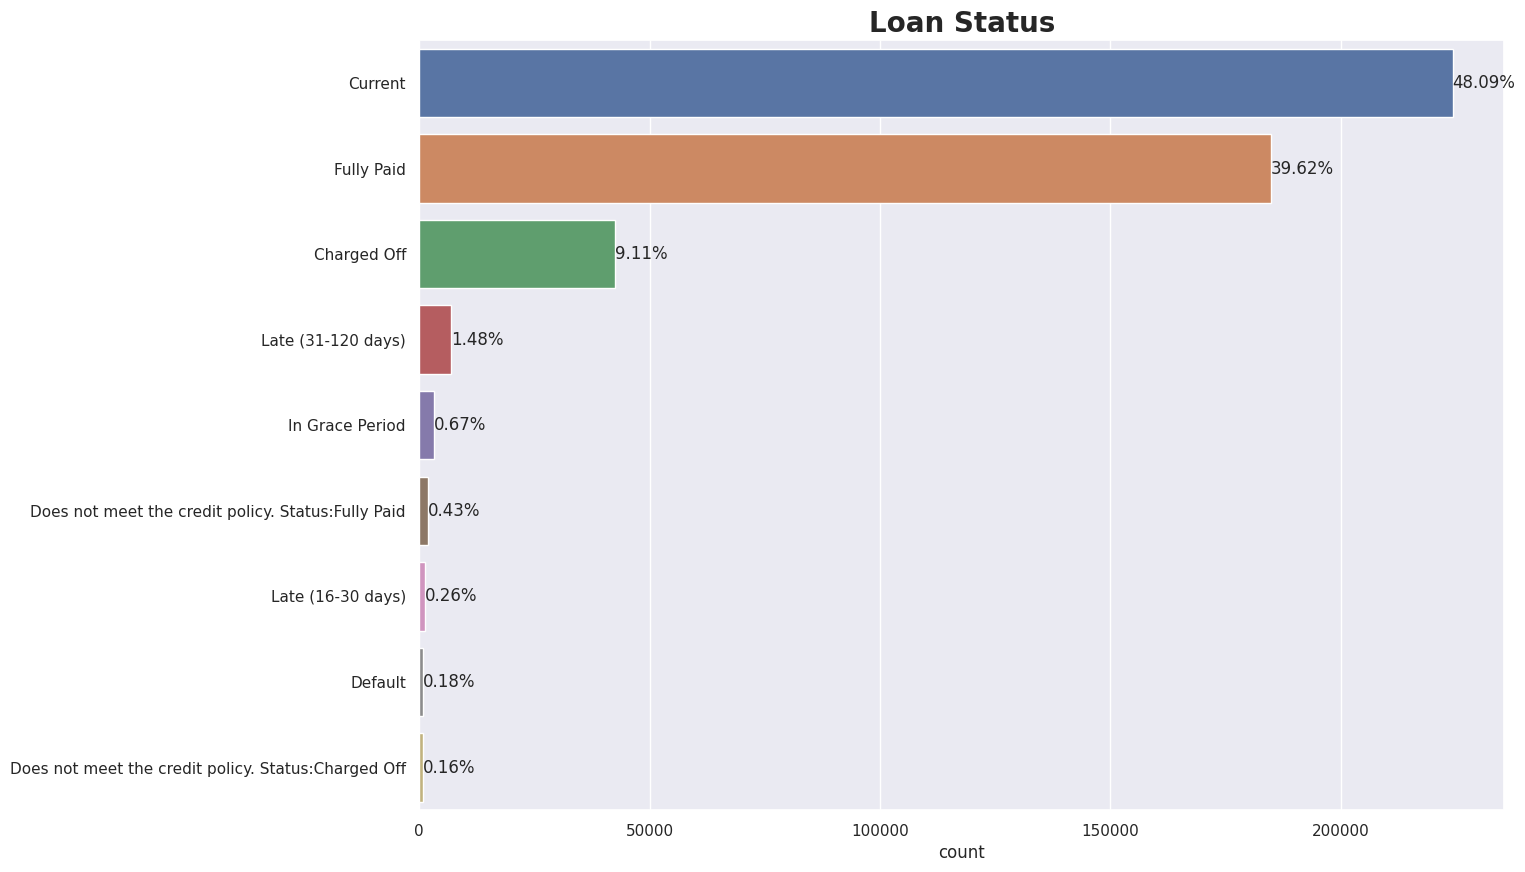

In [38]:
count_plot(raw_df, y_col='loan_status', main_title="Loan Status")

### Total Principal Received by Loan Status

The term "Principal" refers to the principal amount of the loan extended to the borrower. In other words, it is the original sum of money borrowed. Majority of the "Bad Loan" often struggle to repay the principal amount by the due date, as evident from the distribution of payments below. On average, the repayment amount is nearly approaching zero.

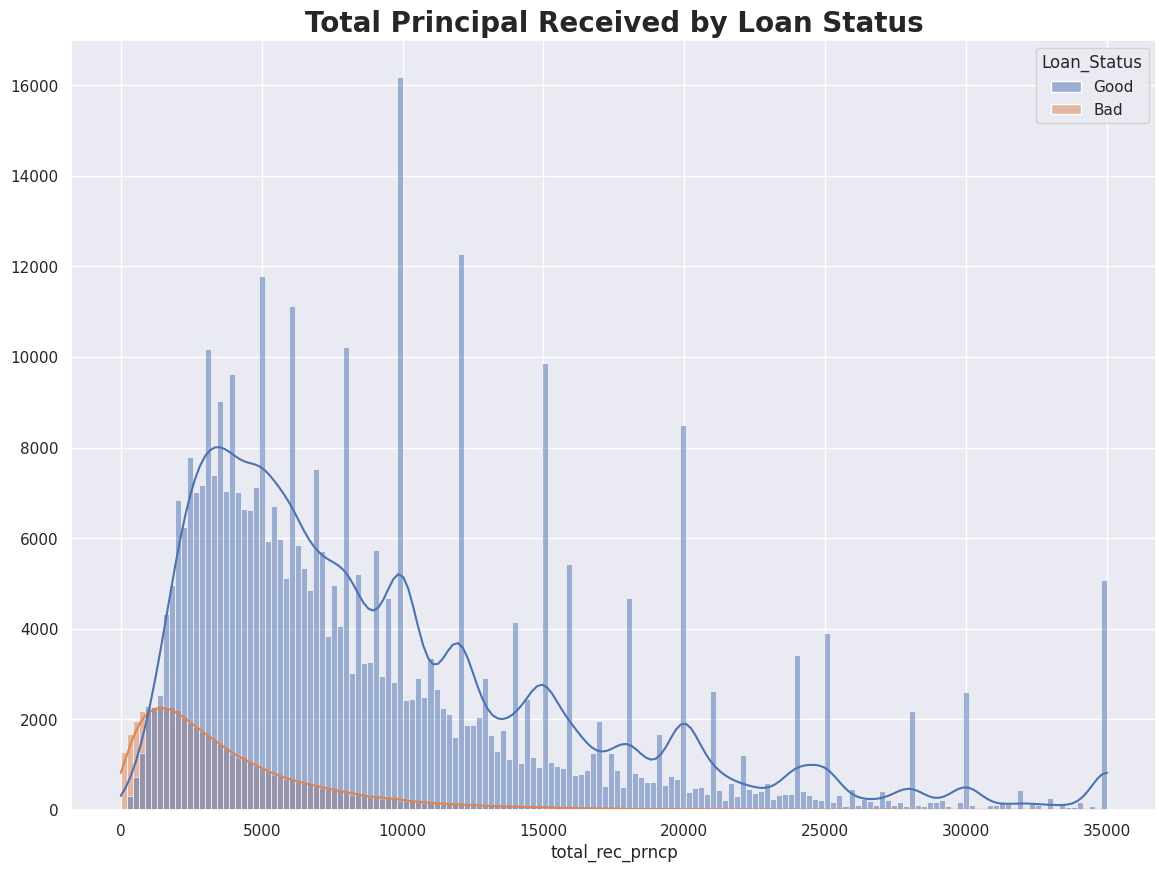

In [39]:
distribution_plot(df=raw_df, x_col="total_rec_prncp", hue="Loan_Status", main_title="Total Principal Received by Loan Status")

### Charged-Off Recoveries by Loan Status

Recoveries from charged-off loans refer to the total amount that cannot be collected by the borrowing company because it has surpassed the due date. Consequently, the borrowing company can release the right to collect the debt by selling it to another company. From this, it's evident that individuals with poor loan statuses are the ones who predominantly have charged-off recoveries.

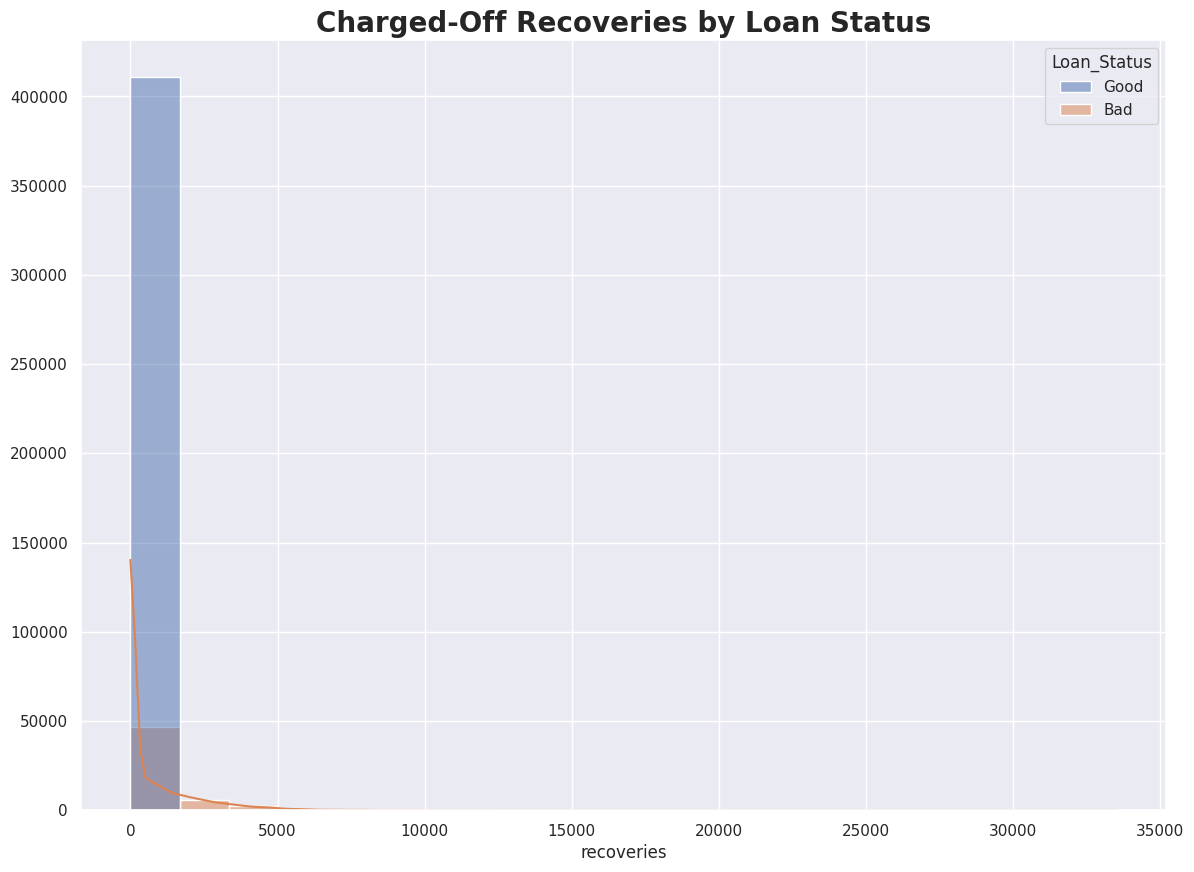

In [40]:
distribution_plot(df=raw_df, x_col="recoveries", hue="Loan_Status", main_title="Charged-Off Recoveries by Loan Status")

### Loan Status by Grade

Most borrowers fall within the B, C, and D grades. However, those with a Bad Loan Status tend to have an average grade of C-D, highlighting a contrast with the Good Loan Status borrowers who, on average, hold a B-C grade.


<Axes: xlabel='grade', ylabel='count'>

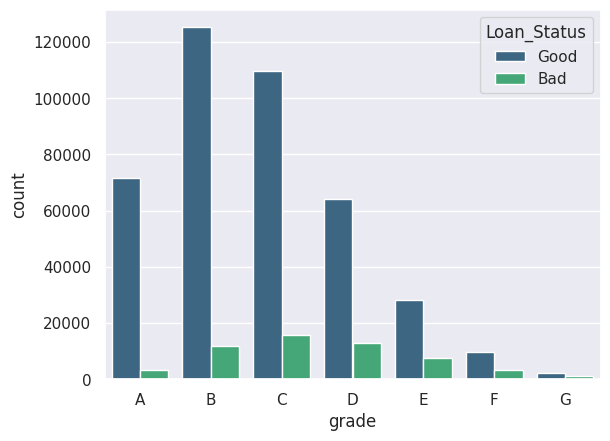

In [41]:
sns.countplot(raw_df, x='grade', hue='Loan_Status', order=['A','B','C','D','E','F','G'], palette='viridis')

### Purpose of Loan

Over 50% of borrowers obtained loans for debt consolidation, followed by purposes such as credit card repayment, home improvement, other unspecified reasons, and major purchases.

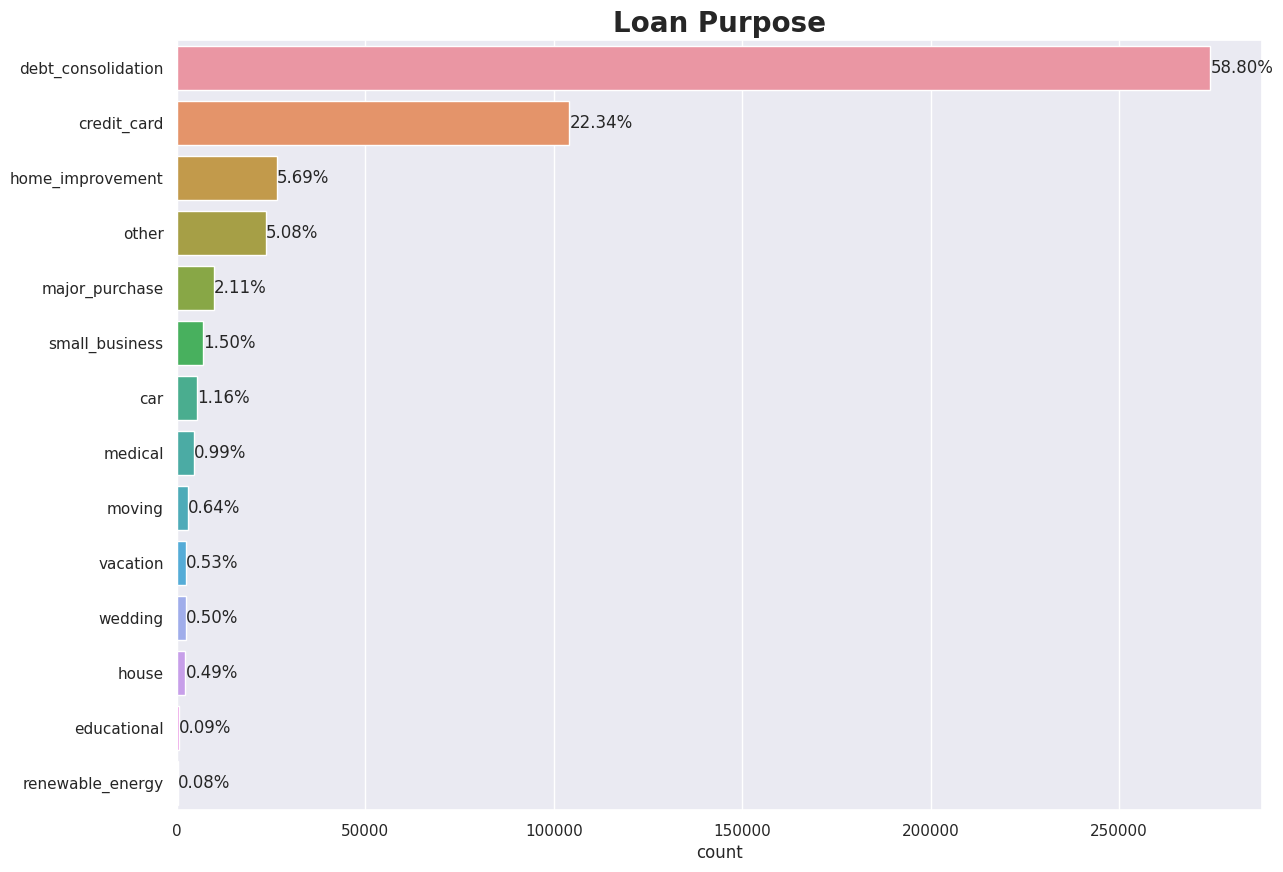

In [42]:
count_plot(raw_df, y_col='purpose', main_title="Loan Purpose")

In [43]:
bad_raw_df = raw_df[raw_df['Loan_Status']=='Bad']

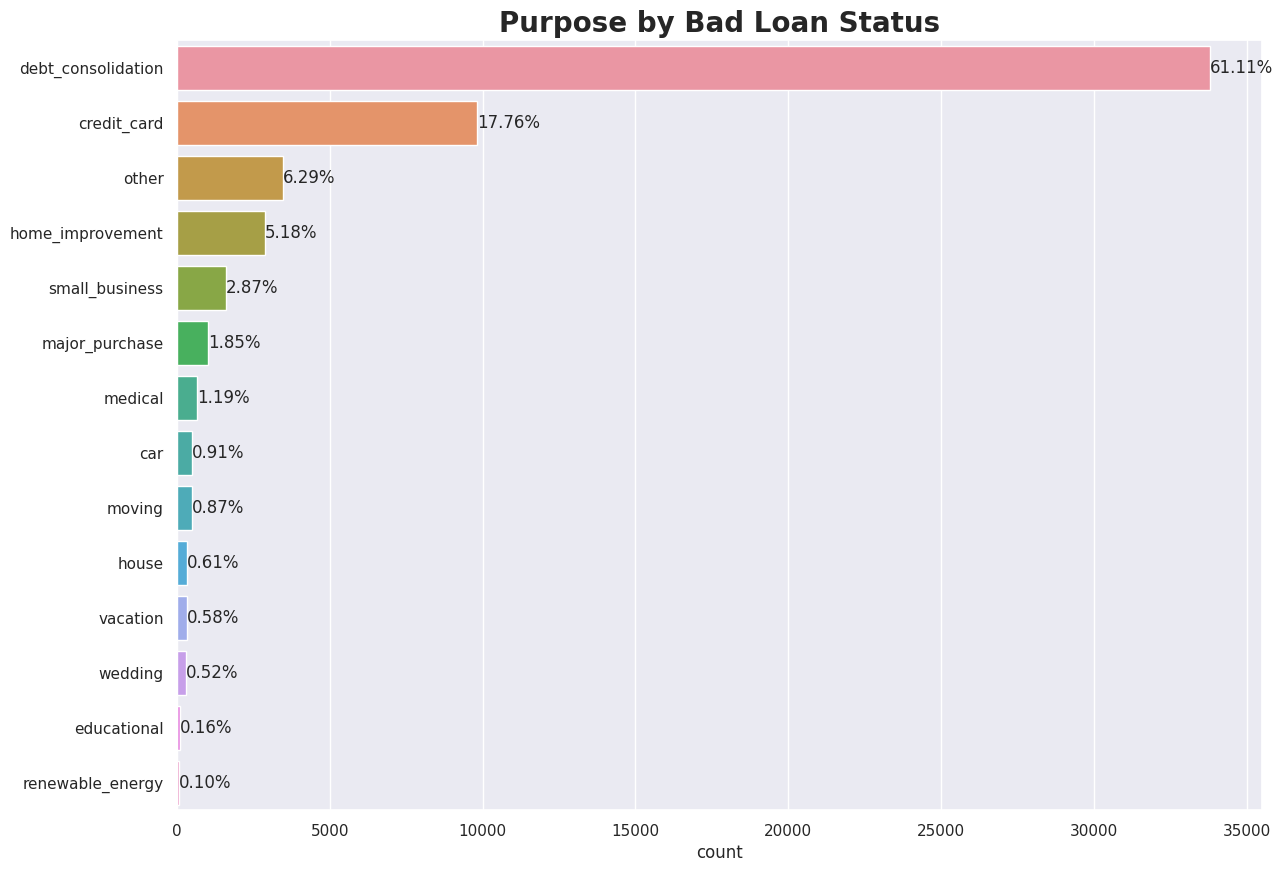

In [44]:
count_plot(bad_raw_df, y_col='purpose', main_title="Purpose by Bad Loan Status")

### State and Territory of Origin

These two graphs highlight the dominant states and territories of origin for borrowers in taking out loans. Overall, and specifically among those with a Bad Loan Status, California led with 15%, followed by New York.

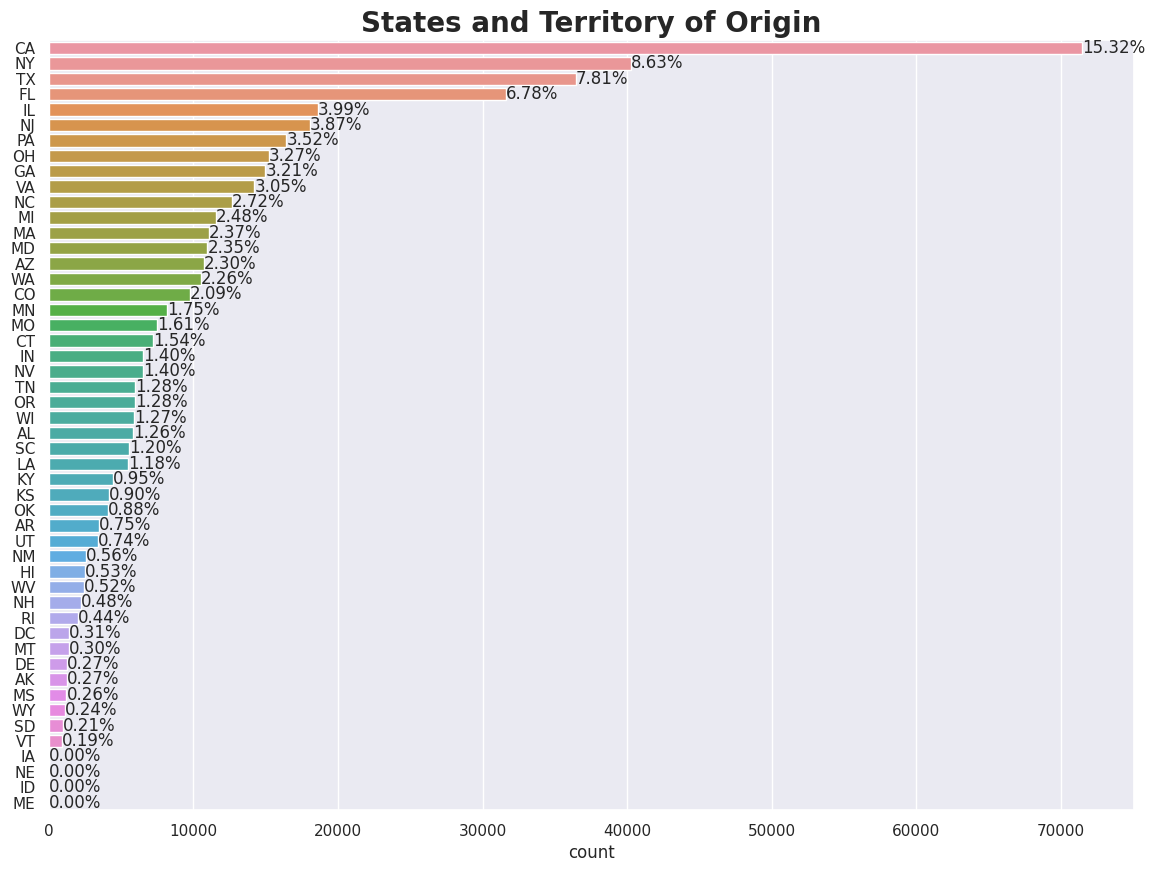

In [45]:
count_plot(raw_df, y_col='addr_state', main_title="States and Territory of Origin")

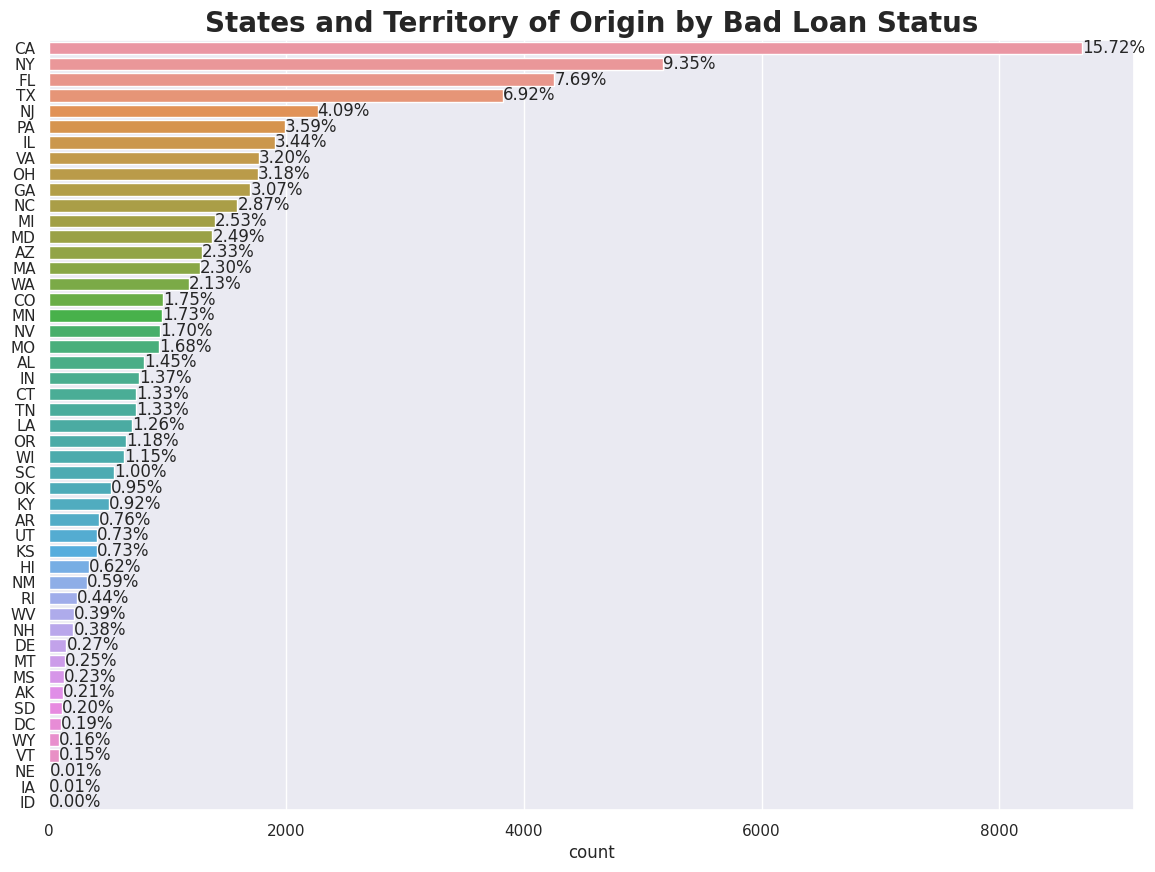

In [46]:
count_plot(bad_raw_df, y_col='addr_state', main_title="States and Territory of Origin by Bad Loan Status")

### Home Ownership



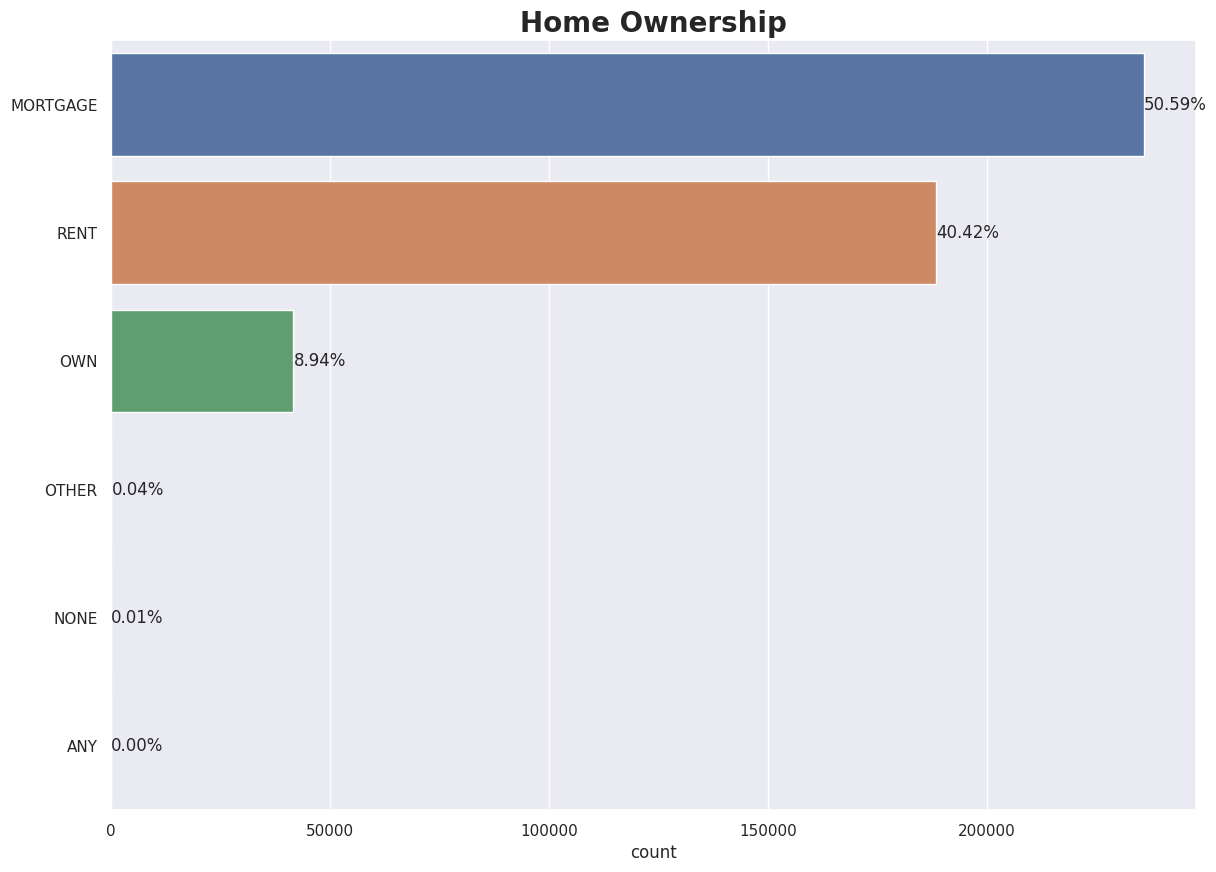

In [47]:
count_plot(raw_df, y_col='home_ownership', main_title="Home Ownership")

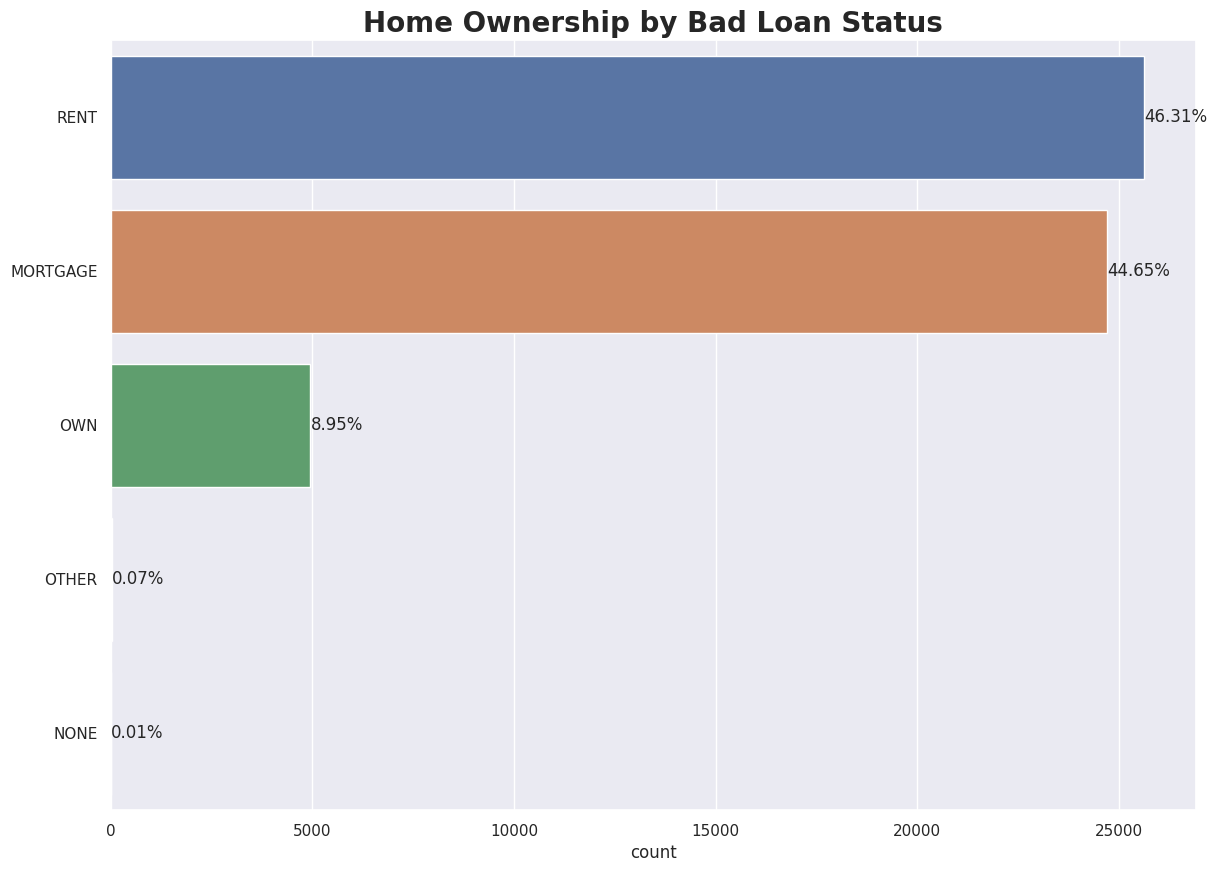

In [48]:
count_plot(bad_raw_df, y_col='home_ownership', main_title="Home Ownership by Bad Loan Status")

### Earliest Credit Line by Loan Status

Recoveries from charged-off loans refer to the total amount that cannot be collected by the borrowing company because it has surpassed the due date. Consequently, the borrowing company can release the right to collect the debt by selling it to another company. From this, it's evident that individuals with poor loan statuses are the ones who predominantly have charged-off recoveries.

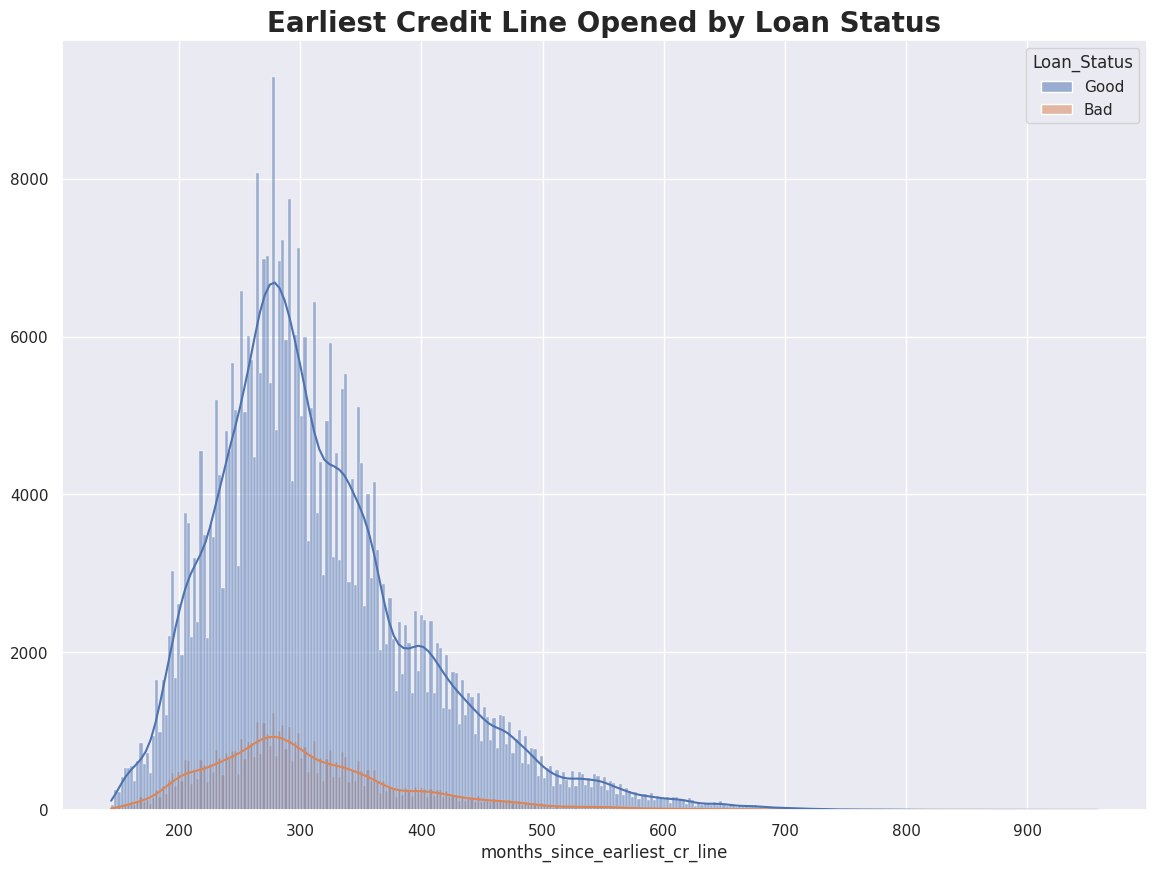

In [49]:
distribution_plot(df=raw_df, x_col="months_since_earliest_cr_line", hue="Loan_Status", main_title="Earliest Credit Line Opened by Loan Status")

## Loan Status and Other Categorical Variables Association

In [50]:
cat = ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'initial_list_status', 'credit_util_rate']
p_val = []

for col in cat:
  # Group by column and 'Loan_Status' and calculate the count
  grouped_df = raw_df.groupby([col,'Loan_Status']).size().reset_index(name='count')

  # Pivot the grouped DataFrame
  pivot_table = grouped_df.pivot(index=col, columns='Loan_Status', values='count').fillna(0)

  # Display the pivot table
  # print(pivot_table)

  # Create a contingency table
  contingency_table = pd.crosstab(raw_df['Loan_Status'], raw_df[col])

  # Perform the chi-square test
  chi2, p, _, _ = chi2_contingency(contingency_table)
  print(f"P-value for {col}: {p}")

  p_val += [p]

P-value for term: 0.0
P-value for grade: 0.0
P-value for emp_length: 2.861599034167368e-22
P-value for home_ownership: 4.809571838626288e-212
P-value for verification_status: 1.9067498787795686e-223
P-value for purpose: 0.0
P-value for addr_state: 8.4646932011048e-93
P-value for initial_list_status: 7.774527916494517e-180
P-value for credit_util_rate: 2.26962565177916e-226


## Loan Status and Other Numerical Variables Correlation

In [51]:
# Calculate the correlation for each variables
correlations = (raw_df.select_dtypes(exclude=object)
                         .corr()
                         .dropna(how="all", axis=0)
                         .dropna(how="all", axis=1)
)

In [52]:
correlations['Loan_Status_num'].abs().sort_values(ascending=False)

Loan_Status_num                    1.000000
recoveries                         0.421185
collection_recovery_fee            0.285672
total_rec_prncp                    0.254151
months_since_last_pymnt_d          0.218847
total_pymnt_inv                    0.191999
total_pymnt                        0.191512
int_rate                           0.179823
last_pymnt_amnt                    0.175568
total_rec_late_fee                 0.160601
out_prncp                          0.130341
out_prncp_inv                      0.130329
months_since_last_credit_pull_d    0.119755
months_since_issue_d               0.072453
inq_last_6mths                     0.071776
revol_util                         0.055238
tot_cur_bal                        0.052235
dti                                0.052063
annual_inc                         0.047953
total_rev_hi_lim                   0.039256
months_since_earliest_cr_line      0.035105
total_acc                          0.020994
installment                     

In [53]:
# Filter correlation between vmin - vmax
vmin, vmax = 0.1, 0.99

unstack_corr = correlations.unstack()
pos_corr = (unstack_corr > vmin) & (unstack_corr < vmax)
neg_corr = (unstack_corr > -vmax) & (unstack_corr < -vmin)
high_corr = unstack_corr[pos_corr | neg_corr]

trimmed_corr = high_corr.sort_values(ascending=False).unstack()

In [54]:
# Make a mask for the lower triangular matrix
mask = np.zeros_like(trimmed_corr)
mask[np.triu_indices_from(mask)] = True

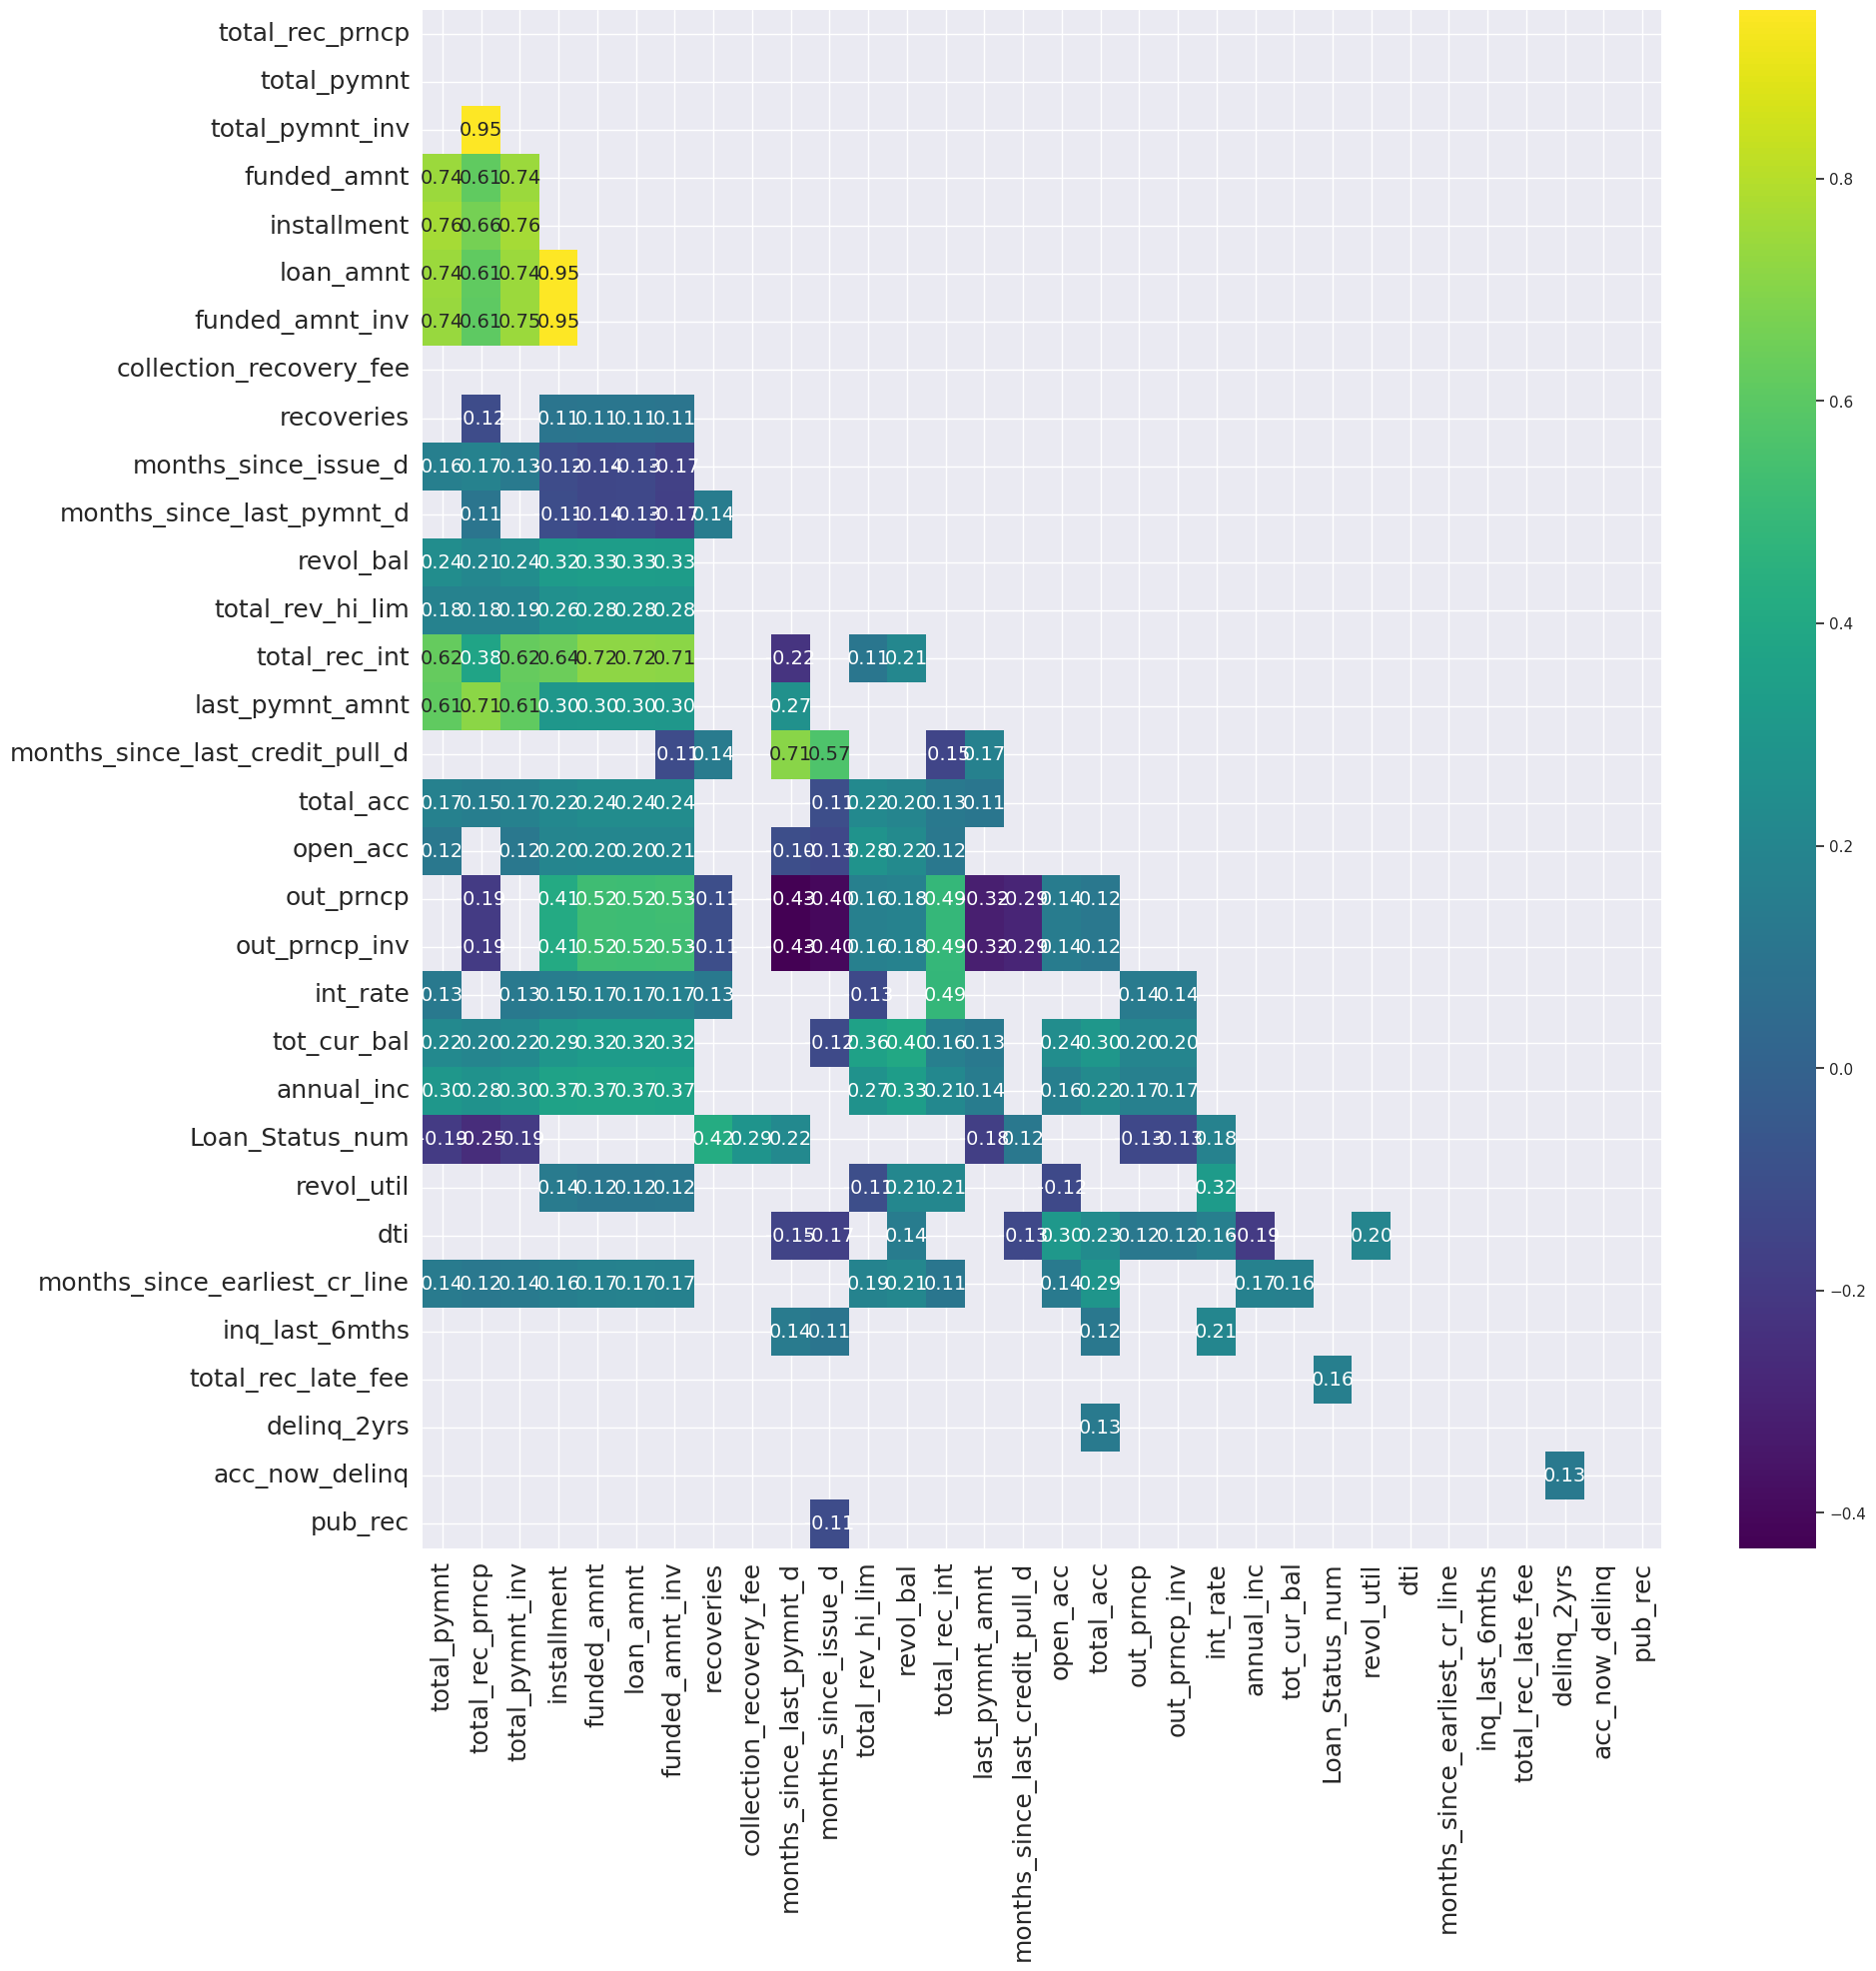

In [55]:
# Show the heatmap
plt.figure(figsize=(20, 20))
plot = sns.heatmap(
    trimmed_corr,
    annot=True,
    mask=mask,
    fmt=".2f",
    cmap="viridis",
    annot_kws={"size": 14})

plot.set_xticklabels(plot.get_xticklabels(), size=18)
plot.set_yticklabels(plot.get_yticklabels(), size=18)
plt.show()

In [56]:
affect_loan = high_corr.loc['Loan_Status_num'].abs().sort_values(ascending=False)
affect_loan

recoveries                         0.421185
collection_recovery_fee            0.285672
total_rec_prncp                    0.254151
months_since_last_pymnt_d          0.218847
total_pymnt_inv                    0.191999
total_pymnt                        0.191512
int_rate                           0.179823
last_pymnt_amnt                    0.175568
total_rec_late_fee                 0.160601
out_prncp                          0.130341
out_prncp_inv                      0.130329
months_since_last_credit_pull_d    0.119755
dtype: float64

# Preprocessing Data

In [57]:
# Separate the dataset attribute and store it into a variable
X1 = pd.get_dummies(raw_df[cat])
X2 = raw_df[affect_loan.index.to_list()]
X = pd.concat([X1, X2], axis=1)

# Separate the dataset label and store it into a variable
y = raw_df['Loan_Status_num']

In [58]:
X.head()

,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,...,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,credit_util_rate_Excellent,credit_util_rate_Fair,credit_util_rate_Good,credit_util_rate_High,credit_util_rate_Poor,recoveries,collection_recovery_fee,total_rec_prncp,months_since_last_pymnt_d,total_pymnt_inv,total_pymnt,int_rate,last_pymnt_amnt,total_rec_late_fee,out_prncp,out_prncp_inv,months_since_last_credit_pull_d
0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,1,0.00,0.00,5000.00,106.0,5831.78,5861.071414,10.65,171.62,0.00,0.0,0.0,94.0
1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,117.08,1.11,456.46,127.0,1008.71,1008.710000,15.27,119.66,0.00,0.0,0.0,122.0
2,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,1,0.00,0.00,2400.00,113.0,3003.65,3003.653644,15.96,649.91,0.00,0.0,0.0,94.0
3,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,0.00,0.00,10000.00,106.0,12226.30,12226.302210,13.49,357.48,16.97,0.0,0.0,106.0
4,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,1,0.00,0.00,2233.10,94.0,3242.17,3242.170000,12.69,67.79,0.00,766.9,766.9,94.0


In [59]:
X_col = list(X.columns.values)
print(X_col)

['term_ 36 months', 'term_ 60 months', 'grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G', 'emp_length_1 year', 'emp_length_10+ years', 'emp_length_2 years', 'emp_length_3 years', 'emp_length_4 years', 'emp_length_5 years', 'emp_length_6 years', 'emp_length_7 years', 'emp_length_8 years', 'emp_length_9 years', 'emp_length_< 1 year', 'home_ownership_ANY', 'home_ownership_MORTGAGE', 'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT', 'verification_status_Not Verified', 'verification_status_Source Verified', 'verification_status_Verified', 'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase', 'purpose_medical', 'purpose_moving', 'purpose_other', 'purpose_renewable_energy', 'purpose_small_business', 'purpose_vacation', 'purpose_wedding', 'addr_state_AK', 'addr_state_AL', 'addr_state_AR', 'addr_state_AZ', 'addr_state_CA'

In [60]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Loan_Status_num, dtype: int64

## Scaling the dataset

In [61]:
from sklearn.preprocessing import StandardScaler

# Standardize Dataset Values
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [62]:
X = pd.DataFrame(X, columns=X_col)
X.head()

,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,...,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,credit_util_rate_Excellent,credit_util_rate_Fair,credit_util_rate_Good,credit_util_rate_High,credit_util_rate_Poor,recoveries,collection_recovery_fee,total_rec_prncp,months_since_last_pymnt_d,total_pymnt_inv,total_pymnt,int_rate,last_pymnt_amnt,total_rec_late_fee,out_prncp,out_prncp_inv,months_since_last_credit_pull_d
0,0.616225,-0.616225,-0.437346,1.550905,-0.606166,-0.444358,-0.288191,-0.170879,-0.084708,-0.260456,1.313737,-0.312039,-0.291837,-0.252866,-0.265823,-0.243561,-0.243897,-0.224615,-0.199733,-0.290402,-0.001464,-1.01179,-0.010356,-0.01976,-0.313407,...,-0.17737,-0.044098,-0.151906,-0.113312,-0.072109,-0.049244,0.734077,-0.734077,-0.188429,-0.28230,-0.219398,-0.555672,0.799503,-0.154549,-0.104824,-0.549800,0.288920,-0.683064,-0.687137,-0.729587,-0.531492,-0.123464,-0.693944,-0.693896,-0.419818
1,-1.622784,1.622784,-0.437346,-0.644785,1.649714,-0.444358,-0.288191,-0.170879,-0.084708,-0.260456,-0.761188,-0.312039,-0.291837,-0.252866,-0.265823,-0.243561,-0.243897,-0.224615,-0.199733,3.443503,-0.001464,-1.01179,-0.010356,-0.01976,-0.313407,...,-0.17737,-0.044098,-0.151906,-0.113312,-0.072109,-0.049244,0.734077,-0.734077,5.307041,-0.28230,-0.219398,-0.555672,-1.250777,0.057470,-0.091840,-1.195952,1.927776,-1.267385,-1.274191,0.330634,-0.540846,-0.123464,-0.693944,-0.693896,2.485820
2,0.616225,-0.616225,-0.437346,-0.644785,1.649714,-0.444358,-0.288191,-0.170879,-0.084708,-0.260456,1.313737,-0.312039,-0.291837,-0.252866,-0.265823,-0.243561,-0.243897,-0.224615,-0.199733,-0.290402,-0.001464,-1.01179,-0.010356,-0.01976,-0.313407,...,-0.17737,-0.044098,-0.151906,-0.113312,-0.072109,-0.049244,0.734077,-0.734077,-0.188429,-0.28230,-0.219398,-0.555672,0.799503,-0.154549,-0.104824,-0.919555,0.835205,-1.025695,-1.032837,0.488979,-0.445387,-0.123464,-0.693944,-0.693896,-0.419818
3,0.616225,-0.616225,-0.437346,-0.644785,1.649714,-0.444358,-0.288191,-0.170879,-0.084708,-0.260456,1.313737,-0.312039,-0.291837,-0.252866,-0.265823,-0.243561,-0.243897,-0.224615,-0.199733,-0.290402,-0.001464,-1.01179,-0.010356,-0.01976,-0.313407,...,-0.17737,-0.044098,-0.151906,-0.113312,-0.072109,-0.049244,0.734077,-0.734077,-0.188429,3.54233,-0.219398,-0.555672,-1.250777,-0.154549,-0.104824,0.161268,0.288920,0.091640,0.082948,-0.077850,-0.498032,3.099264,-0.693944,-0.693896,0.825455
4,-1.622784,1.622784,-0.437346,1.550905,-0.606166,-0.444358,-0.288191,-0.170879,-0.084708,3.839423,-0.761188,-0.312039,-0.291837,-0.252866,-0.265823,-0.243561,-0.243897,-0.224615,-0.199733,-0.290402,-0.001464,-1.01179,-0.010356,-0.01976,-0.313407,...,-0.17737,-0.044098,-0.151906,-0.113312,-0.072109,-0.049244,0.734077,-0.734077,-0.188429,-0.28230,-0.219398,-0.555672,0.799503,-0.154549,-0.104824,-0.943290,-0.647569,-0.996798,-1.003980,-0.261438,-0.550184,-0.123464,-0.573268,-0.573185,-0.419818


## Split the Dataset Into Train and Test Data

In [63]:
from sklearn.model_selection import train_test_split

# Split the training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=2106)

## Evaluating the Dataset's Imbalance

In [64]:
y_train.value_counts()

0    275487
1     36923
Name: Loan_Status_num, dtype: int64

We can see that the response values are very imbalance. Since we have a large amount of data, which is more than >10.000 data, we can use undersampling technique to address the imbalance in datasets.

In [65]:
!apt-get install python3.10

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3.10 is already the newest version (3.10.12-1~22.04.3).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [66]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

under_sampler = RandomOverSampler(random_state=123)

X_resampled, y_resampled = under_sampler.fit_resample(X_train.values, y_train.ravel())
Counter(y_resampled)

Counter({1: 275487, 0: 275487})

Convert the array back to dataframe with Pandas.

In [67]:
col = X_train.columns.to_list()

X_train = pd.DataFrame(X_resampled,
             columns=col)

y_train = pd.Series(y_resampled)

# Training Machine Learning Model

In [ ]:
from sklearn.svm import SVC

SVClassifier = SVC()
SVClassifier.fit(X_train, y_train)
y_pred_SV = SVClassifier.predict(X_train)
y_pred_SV_test = SVClassifier.predict(X_test)

In [ ]:
print(accuracy_score(y_train, y_pred_SV))
print(accuracy_score(y_test, y_pred_SV_test))

In [ ]:
# Show the model accuracy
SVClassifier.score(X_test, y_test)

0.9997075548334687